In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [9]:
df.isna().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [10]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [15]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_Fare = X_train['Fare'].std()
median_Fare = X_train['Fare'].median()

In [18]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_Fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_Fare)

In [19]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
394,24.0,16.7000,2,24.0,24.0,16.7000,16.7000
807,18.0,7.7750,0,18.0,18.0,7.7750,7.7750
69,26.0,8.6625,2,26.0,26.0,8.6625,8.6625
750,4.0,23.0000,2,4.0,4.0,23.0000,23.0000
456,65.0,26.5500,0,65.0,65.0,26.5500,26.5500


In [20]:
print('Original Age variable Variance:', X_train['Age'].var())
print('Age Variance after median Imputation:', X_train['Age_median'].var())
print('Age variance after mean Imputation:', X_train['Age_mean'].var())

print('Original Fare variable Variance:', X_train['Fare'].var())
print('Fare Variance after median Imputation:', X_train['Fare_median'].var())
print('Fare variance after mean Imputation:', X_train['Fare_mean'].var())

Original Age variable Variance: 204.3495133904614
Age Variance after median Imputation: 161.9895663346054
Age variance after mean Imputation: 161.81262452718673
Original Fare variable Variance: 2448.197913706318
Fare Variance after median Imputation: 2340.0910219753637
Fare variance after mean Imputation: 2337.9063945945954


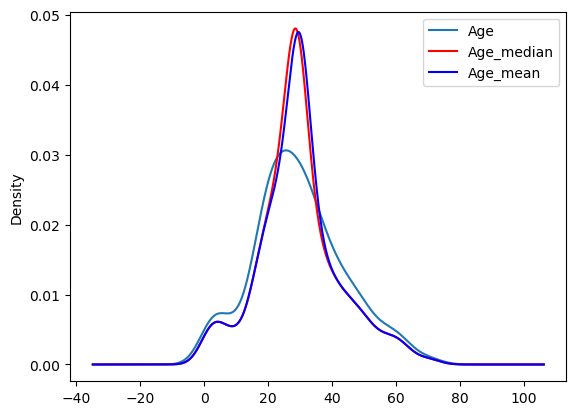

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

X_train['Age_mean'].plot(kind='kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

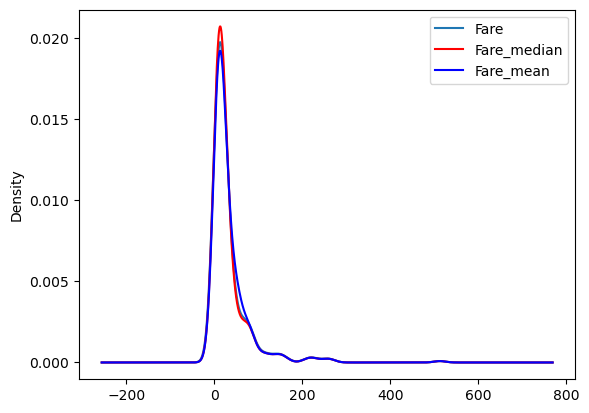

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_mean'].plot(kind='kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [23]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,68.342473
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.300312
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,56.387606
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,54.116473
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2309.518816
Fare_mean,68.342473,2448.197914,16.300312,56.387606,54.116473,2309.518816,2337.906395


In [24]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.092261
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.203837
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.091628
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.087985
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.987396
Fare_mean,0.092261,1.000000,0.203837,0.091628,0.087985,0.987396,1.000000


<Axes: >

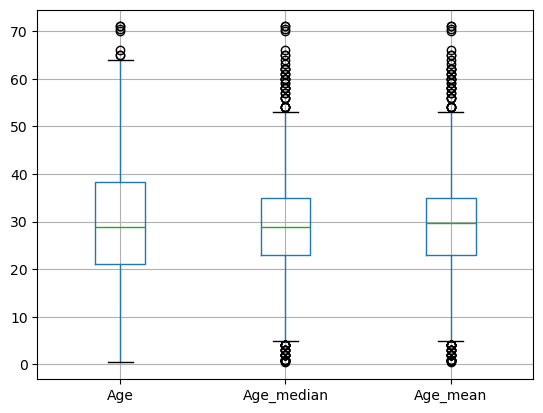

In [25]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

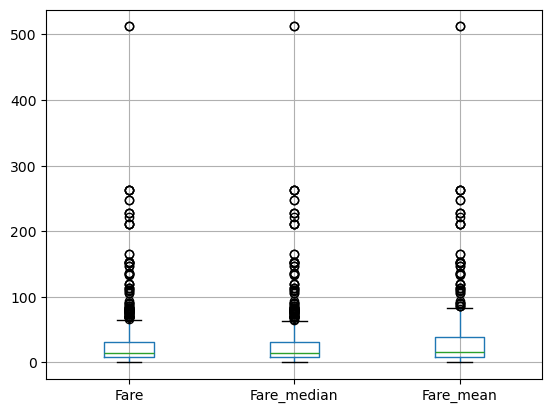

In [27]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [29]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [32]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
])

In [34]:
trf.fit(X_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [36]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [37]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [38]:
X_train

array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 28.75  , 221.7792],
       [ 28.75  ,  25.925 ]])

In [39]:
X_train = pd.DataFrame(X_train,columns=['Age','Fare'])

In [40]:
X_train

,Age,Fare
0,40.00,27.7208
1,4.00,16.7000
2,47.00,9.0000
3,9.00,31.3875
4,20.00,9.8458
...,...,...
707,30.00,8.6625
708,28.75,8.7125
709,71.00,49.5042
710,28.75,221.7792


# Arbitrary Value Imputation

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_m1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_m1'] = X_train['Fare'].fillna(-1)

In [54]:
X_train.isnull().sum()

Age        148
Fare        36
Family       0
Age_99       0
Age_m1       0
Fare_99      0
Fare_m1      0
dtype: int64

In [55]:
print('Original Age variable Variance:', X_train['Age'].var())
print('Age Variance after median Imputation:', X_train['Age_99'].var())
print('Age variance after mean Imputation:', X_train['Age_m1'].var())

print('Original Fare variable Variance:', X_train['Fare'].var())
print('Fare Variance after median Imputation:', X_train['Fare_99'].var())
print('Fare variance after mean Imputation:', X_train['Fare_m1'].var())

Original Age variable Variance: 204.3495133904614
Age Variance after median Imputation: 951.7275570187172
Age variance after mean Imputation: 318.0896202624484
Original Fare variable Variance: 2448.197913706318
Fare Variance after median Imputation: 2536.0773428319685
Fare variance after mean Imputation: 2378.5676784883503


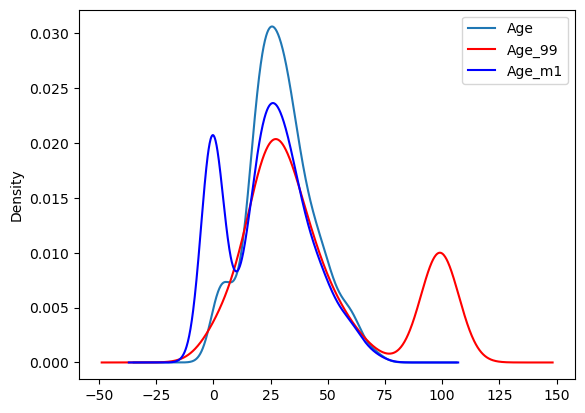

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_99'].plot(kind='kde',ax=ax,color='red')

X_train['Age_m1'].plot(kind='kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

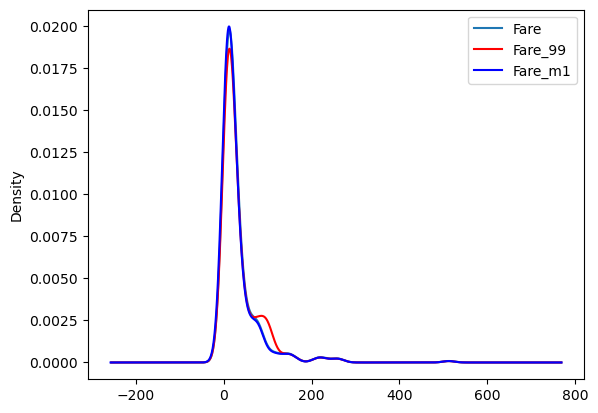

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_99'].plot(kind='kde',ax=ax,color='red')

X_train['Fare_m1'].plot(kind='kde',ax=ax,color='blue')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)